In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.metrics import r2_score
from io import StringIO
import glob
import os
import raytracing as rt
from scipy.ndimage import gaussian_filter

import scipy.optimize as spo
import scipy.constants as spc
import scipy.integrate as spi
import scipy.linalg as spl
import scipy.signal as spsi
import scipy.stats as spst

In [42]:
def lire_csv(chemin_fichier):
    """
    Lecture d'un fichier CSV avec une première ligne à ignorer,
    et renvoie un DataFrame pandas.

    Args:
        chemin_fichier (str): Le chemin d'accès vers le fichier CSV.

    Returns:
        pandas.DataFrame: Un DataFrame pandas contenant les données du fichier CSV.
    """
    # Lire le fichier en ignorant la première ligne
    with open(chemin_fichier, 'r', encoding='utf-8') as fichier:
        lignes = fichier.readlines()[1:]  # Ignorer la première ligne
    
    # Préparer le contenu transformé
    contenu_transforme = []
    for ligne in lignes:
        partie_gauche, _, partie_droite = ligne.partition(', ')  # Séparer à la première virgule
        partie_gauche, partie_droite = partie_gauche.replace(',', '.'), partie_droite.replace(',', '.')   # Au cas où, mais devrait être inutile ici
        ligne_transformee = partie_gauche + ';' + partie_droite
        contenu_transforme.append(ligne_transformee)
    
    # Convertir le contenu transformé en un objet StringIO
    contenu_csv = StringIO(''.join(contenu_transforme))
    
    # Lire le contenu transformé en DataFrame
    df = pd.read_csv(contenu_csv, names=['Pixels', 'Value'],sep=";")
    return df

In [43]:
def normalisation(dataframe):
    """Fonction qui normalise les dataframes.

    Args:
        dataframe (DataFrame)

    Returns:
        DataFrame: Dataframe normalisé.
    """
    return (dataframe-min(dataframe))/np.ptp(dataframe)

In [44]:
def find_maximum_intensity(dataset,mini=0, maxi=1, divisor=1):
    """Fonction qui trouve les maximums d'intensité.

    Args:
        dataset (array): dataset comprenant plusieurs dataframe.

    Returns:
        array: liste des maximums pour chaque dataframe.
    """
    max_from_dataset = []

    subset = dataset.loc[(dataset["Value"] >= mini) & (dataset["Value"] <= maxi)]
    max_from_dataset += [np.max(subset[1]/divisor)]
    return max_from_dataset

In [45]:
def figure_plot_p4(df):
    mpl.figure(figsize=(12,6))
    mpl.plot(df["Pixels"], normalisation(df["Value"]),color="k")
    mpl.ylabel("Intensité normalisée [-]")
    mpl.xlabel("Position [Pixel]")
    # mpl.legend(frameon=False) 
    mpl.tick_params(axis='both', which='both', direction='in')
    mpl.minorticks_on()
    mpl.show()

# Données partie 4

## Données partie 4 x

In [46]:
# Données 2D
partie4_2d_x = lire_csv(r"partie_4\partie4_2d_x.csv")

# Données avec filtre Ramlack
partie4_3d_040_025_ramlack_x = lire_csv(r"partie_4/partie4_3d_040_025_ramlack_x.csv")
partie4_3d_040_025_ramlack_x_v2 = lire_csv(r"partie_4\partie4_3d_040_025_ramlack_x_v2.csv")
partie4_3d_160_025_ramlack_x = lire_csv(r"partie_4\partie4_3d_160_025_ramlack_x.csv")

# Influence de la résolution : 0,25 ; 0,50 ; 2,00
partie4_3d_320_025_x = lire_csv(r"partie_4\partie4_3d_320_025_x.csv")
partie4_3d_320_050_x = lire_csv(r"partie_4\partie4_3d_320_050_x.csv")
partie4_3d_320_200_x = lire_csv(r"partie_4\partie4_3d_320_200_x.csv")

## Données partie 4 y

In [47]:
# Données 2D
partie4_2d_y = lire_csv(r"partie_4\partie4_2d_y.csv")

# Données avec filtre Ramlack
partie4_3d_040_025_ramlack_y_v2 = lire_csv(r"partie_4\partie4_3d_040_025_ramlack_y_v2.csv")
partie4_3d_040_025_ramlack_y = lire_csv(r"partie_4\partie4_3d_040_025_ramlack_y.csv")
partie4_3d_160_025_ramlack_y = lire_csv(r"partie_4\partie4_3d_160_025_ramlack_y.csv")

# Données avec diaphragme
partie4_3d_320_025_dia050_y = lire_csv(r"partie_4\partie4_3d_320_025_dia050_y.csv")
partie4_3d_320_025_dia150_y = lire_csv(r"partie_4\partie4_3d_320_025_dia150_y.csv")

# Données sans filtre
partie4_3d_320_025_nofilter_y = lire_csv(r"partie_4\partie4_3d_320_025_nofilter_y.csv")

# Influence de la résolution : 0,25 ; 0,50 ; 2,00
partie4_3d_320_025_y = lire_csv(r"partie_4\partie4_3d_320_025_y.csv")
partie4_3d_320_050_y = lire_csv(r"partie_4\partie4_3d_320_050_y.csv")
partie4_3d_320_200_y = lire_csv(r"partie_4\partie4_3d_320_200_y.csv")

# Graphiques

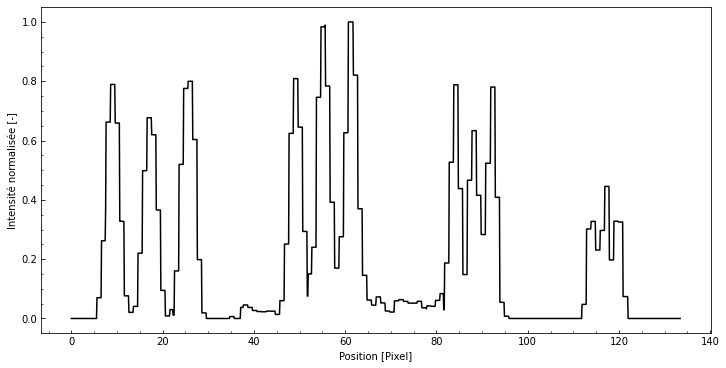

In [48]:
figure_plot_p4(partie4_3d_040_025_ramlack_y_v2)